## Text Classification
In this notebook, we will introduce some popular supervised and unsupervised learning techniques for text classification.

In [1]:
# data vectorization before any machine learning algorithm is applied
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

corpus = ["Quiz yesterday", "Homework for the day", "Meeting at 10 AM", 
          "Lecture at 7 PM", "Project due tomorrow", "Exam is coming"]
labels = np.array([1, 1, 0, 0, 0, 1])

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, stratify=labels, random_state=42)
print("Train")
print(X_train.shape, y_train)
print("Test")
print(X_test.shape, y_test)
print("Feature size and names:")
print(len(vectorizer.get_feature_names_out()), vectorizer.get_feature_names_out())

Train
(3, 18) [1 1 0]
Test
(3, 18) [0 0 1]
Feature size and names:
18 ['10' 'am' 'at' 'coming' 'day' 'due' 'exam' 'for' 'homework' 'is'
 'lecture' 'meeting' 'pm' 'project' 'quiz' 'the' 'tomorrow' 'yesterday']


### 1. Naive Bayes Classifier
A supervised learning algorithm that is based on Bayes' theorem. It is called "naive" because it assumes that all the features are conditionally independent of each other. 

In [2]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB

# Train Naive Bayes classifier, try with different models yourself
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
predictions = nb.predict(X_test)
print("Predictions:", predictions)
print("Labels:", y_test)

Predictions: [1 1 1]
Labels: [0 0 1]


### 2. Support Vector Machines
A powerful and versatile machine learning algorithm that can be used for both classification and regression tasks.

In [3]:
from sklearn import svm

# Train SVC model
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict
predictions = svm.predict(X_test)
print("Predictions:", predictions)
print("Labels:", y_test)

Predictions: [1 1 1]
Labels: [0 0 1]


### 3. Extreme Learning Machine (ELM)
A single-layer feedforward neural network with randomly initialized weights and biases. 

In [4]:
from hpelm import ELM 

elm = ELM(X_train.shape[1], 1)
elm.add_neurons(10, 'sigm')  # Add 10 sigmoid neurons
elm.train(X_train, y_train)

# Predict
predictions = elm.predict(X_test).round().flatten()
print("Predictions:", predictions)
print("Labels:", y_test)

Predictions: [0. 1. 1.]
Labels: [0 0 1]


### 4. Gaussian Processes
Non-parametric models that provide uncertainty estimates for predictions.

In [5]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Train Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=RBF())
gpc.fit(X_train, y_train)

# Predict
predictions = gpc.predict(X_test)
print("Predictions:", predictions)
print("Labels:", y_test)

Predictions: [1 0 1]
Labels: [0 0 1]


### 5. Linear Regression
IT predicts a continuous value and can be used in NLP for tasks like sentiment scoring or text-based numerical predictions.

In [6]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict scores
predictions = lr.predict(X_test)
print("Predictions:", predictions)
print("Labels:", y_test)

Predictions: [0.66666667 0.52357228 0.66666667]
Labels: [0 0 1]


### 6. CLustering
It groups data points into clusters based on their similarity, often used for document grouping or topic discovery. 

In [7]:
# K-Means
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Print cluster assignments
print("Cluster Labels:", kmeans.labels_)

Cluster Labels: [0 1 0 0 1 1]


In [8]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Compute linkage matrix, using ward method. Change the method for different linkage
linkage_matrix = linkage(X, method='ward')

# Assign clusters
clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')
print("Cluster Assignments:", clusters-1)

Cluster Assignments: [1 1 0 0 1 1]


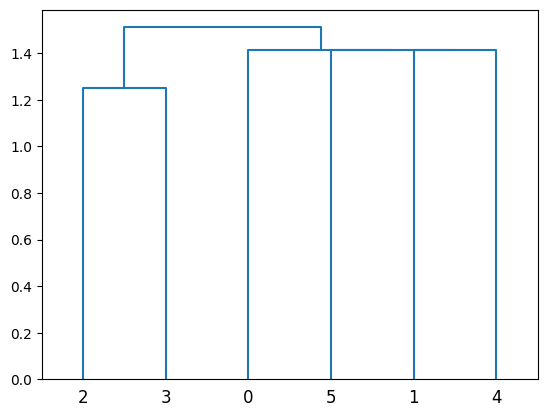

In [9]:
# Plot dendrogram
dendrogram(linkage_matrix)
plt.show()

In [10]:
# Fuzzy clustering
from fuzzycmeans import FCM

# Apply Fuzzy C-Means
fcm = FCM(n_clusters=2, max_iter=5)
fcm.fit(X_train, y_train)
predictions = fcm.predict(X_test)

print("Membership probabilities:\n", predictions)
print("Cluster assignment (not in the order of the original labels):\n", predictions[:, 1].round())
print("Labels:", y_test)

Membership probabilities:
 [[0.42857143 0.57142857]
 [0.48848529 0.51151471]
 [0.42857143 0.57142857]]
Cluster assignment (not in the order of the original labels):
 [1. 1. 1.]
Labels: [0 0 1]


### Practice for the Week


Now that you have learned about the traditional machine learning algorithms and how it applies to NLP tasks, let's work on the task of sentiment analysis with the dataset we have been using in the prevsious week, Corona_NLP_train.

In [12]:
# Import more necessary modules
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

# Generates a confusion matrix (a evaluation metric that you will learn in week 5) between hand labelled data and model predictions
def getConfMatrix(pred_data, actual):
    conf_mat = confusion_matrix(actual, pred_data, labels=[0, 1]) 
    micro = f1_score(actual, pred_data, average='micro') 
    macro = f1_score(actual,pred_data, average='macro')
    sns.heatmap(conf_mat, annot = True, fmt=".0f", annot_kws={"size": 18})
    print('F1 Micro: '+ str(micro))
    print('F1 Macro: '+ str(macro))

In [ ]:
# Load the csv file into a pandas dataframe

# data preprocessing

# Vectorize the text data

# Split the data into training and testing sets

# Train a machine learning model on the training set

# Evaluate the performance of the model on the testing set using the getConfMatrix function